In [2]:
# TODO: short markdown readme on what this notebook does

In [3]:
import matplotlib.pyplot as plt
import os
import pandas as pd
import json
import seaborn as sns

DEFAULT_METRICS = ['time', 'adjusted_rand_score', 'adjusted_mutual_info_score']

# if looking for a particular export: provide name in format 'res_YYYY_MM_DD_THH_MM_SS'
RESULTS_DIR = None

/var/folders/6s/9yzdsc4d607_h7bjhlvxylkw0000gn/T/ipykernel_65463/2498931122.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [4]:
# calculate last export generated if none is specified, read in files
if RESULTS_DIR == None:
    dir_list = next(os.walk('results/'))[1]
    RESULTS_DIR = max(dir_list)

full_path    = f'results/{RESULTS_DIR}'
results_dump = f'{full_path}/results_dump.json'

print(f'Reading from results dump: \033[1m{results_dump}')

Reading from results dump: results/res_2024_03_08_T18_27_39/results_dump.json


In [5]:
def json_to_df(path):
  # unzip the file, load in each line as an object
  g = open(path, 'rb')
  g = [json.loads(l) for l in g]

  # map to a dictionary, then load in as a dataframe
  dict_df = {i: d for (i, d) in enumerate(g)}
  return pd.DataFrame.from_dict(dict_df, orient='index')

# extract the dataframe, reorder columns, display sample
results_df = json_to_df(results_dump)
results_df = results_df[[
  'log_time', 'experiment', 'variant', 'n_points', 'noise',
  'time', 'timed_out',
  'adjusted_mutual_info_score', 'adjusted_rand_score', 'completeness_score', 'homogeneity_score', 'normalized_mutual_info_score', 'v_measure_score',
]]
results_df

,log_time,experiment,variant,n_points,noise,time,timed_out,adjusted_mutual_info_score,adjusted_rand_score,completeness_score,homogeneity_score,normalized_mutual_info_score,v_measure_score
0,2024-03-11 10:45:34.057690,DEFAULT,DEFAULT,100,0.00,0.010349,False,0.759256,0.808081,0.763795,0.758277,0.761026,0.761026
1,2024-03-11 10:45:34.072964,DEFAULT,DEFAULT,100,0.00,0.008266,False,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
2,2024-03-11 10:45:34.087572,DEFAULT,DEFAULT,100,0.00,0.008154,False,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
3,2024-03-11 10:45:34.108407,DEFAULT,DEFAULT,100,0.00,0.013555,False,0.394300,0.484848,0.400204,0.397313,0.398753,0.398753
4,2024-03-11 10:45:34.137171,DEFAULT,DEFAULT,100,0.00,0.012130,False,0.433763,0.485050,0.445979,0.430280,0.437989,0.437989
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4445,2024-03-11 13:01:51.780200,Affinity,euclidean,2800,0.15,10.000000,True,NaN,NaN,NaN,NaN,NaN,NaN
4497,2024-03-11 13:03:51.528588,Affinity,euclidean,2800,0.20,10.000000,True,NaN,NaN,NaN,NaN,NaN,NaN
4547,2024-03-11 13:05:37.382572,Affinity,manhattan,2800,0.00,10.000000,True,NaN,NaN,NaN,NaN,NaN,NaN
5349,2024-03-11 13:34:33.215027,Standardisation,none,2800,0.05,10.000000,True,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
# extract all the experiments and variants present in the dump
experiment_variants = results_df.groupby('experiment')['variant'].apply(set)
print('The following experiments and variants were found in results dump:')
padding = max([len(x) for x in experiment_variants.index])

for (experiment, variants) in experiment_variants.items():
    print(f'\033[1m{experiment:<{padding}}\033[0m: {", ".join(variants)}')

The following experiments and variants were found in results dump:
Affinity       : euclidean, manhattan
DEFAULT        : DEFAULT
Decomposition  : dense_eigh, dense, sparse, sparse_eigh
Laplacian      : normalised, standard
Refinement     : eps, knn
Standardisation: none, min-max, standard


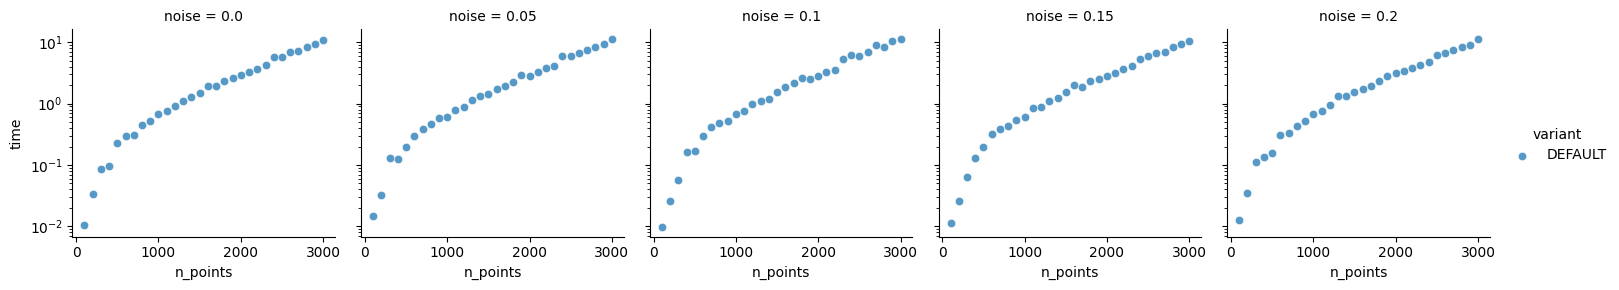

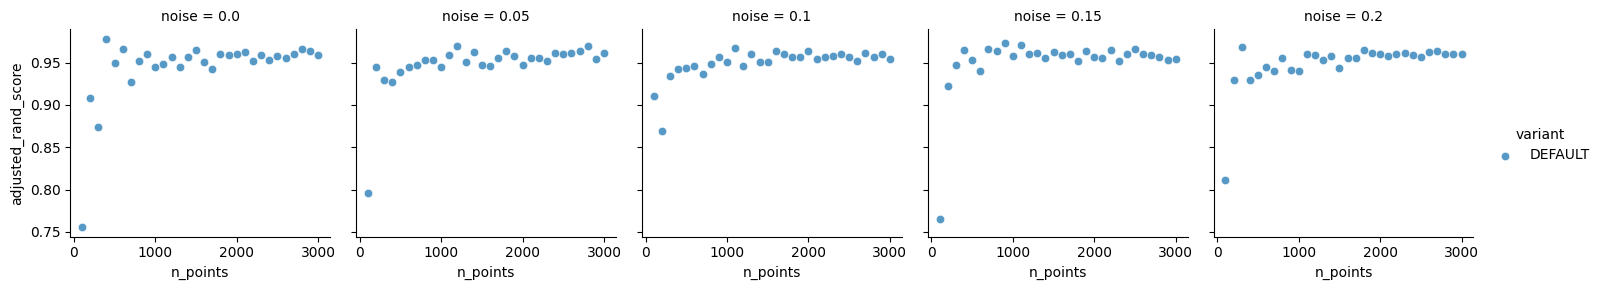

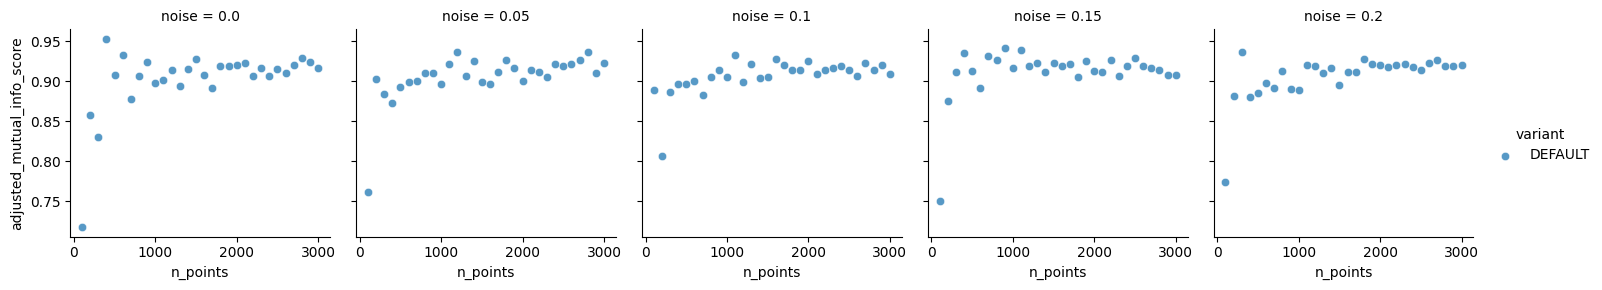

In [16]:
def show_experiment_results(experiment, metrics = DEFAULT_METRICS):

    # filter given experiment, average out over repeats
    experiment_results = results_df[(results_df['experiment'] == experiment)]
    summarised = experiment_results.groupby(['noise', 'variant', 'n_points']).mean(True).reset_index()

    # for each metric to plot, show a (single row) facetgrid 
    for metric in metrics:
        g = sns.FacetGrid(summarised, col="noise", hue='variant')
        g.map_dataframe(sns.scatterplot, "n_points", metric, alpha = 0.75)
        g.add_legend()
        if metric == 'time':
            plt.yscale('log')
        plt.show()

show_experiment_results('DEFAULT')

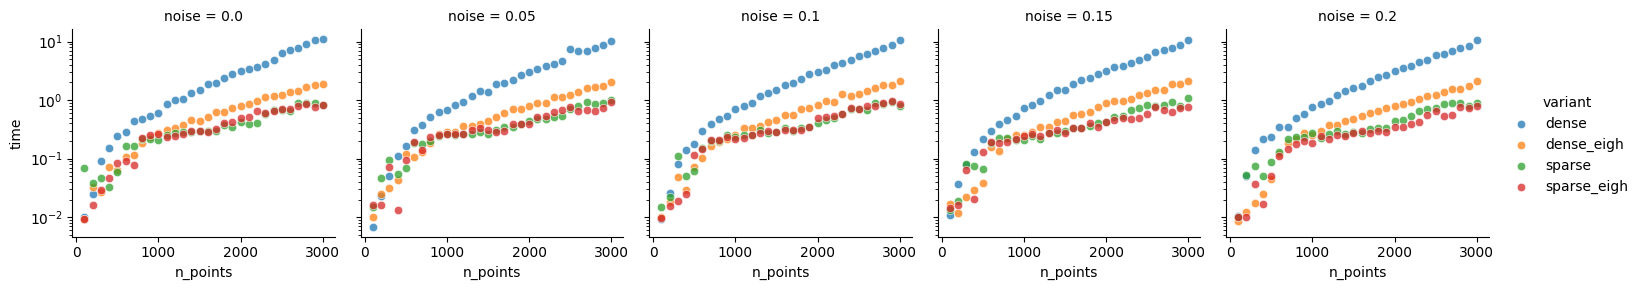

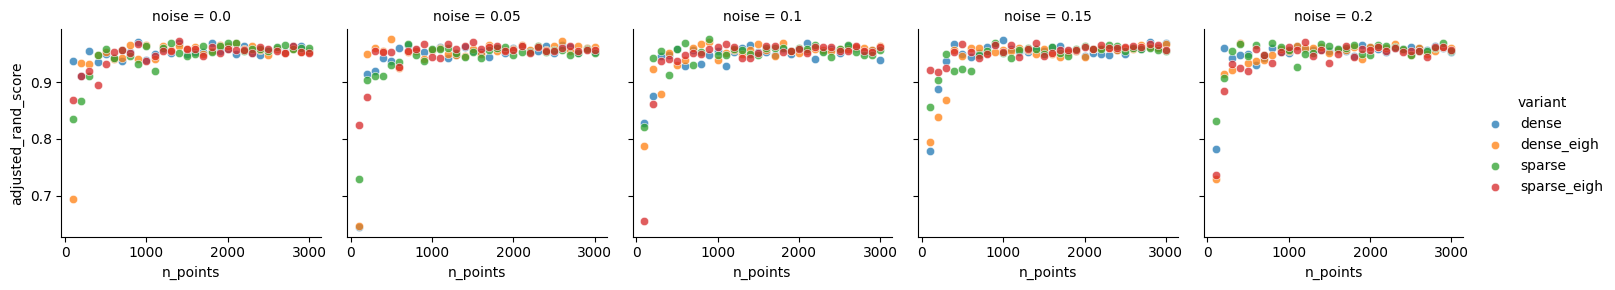

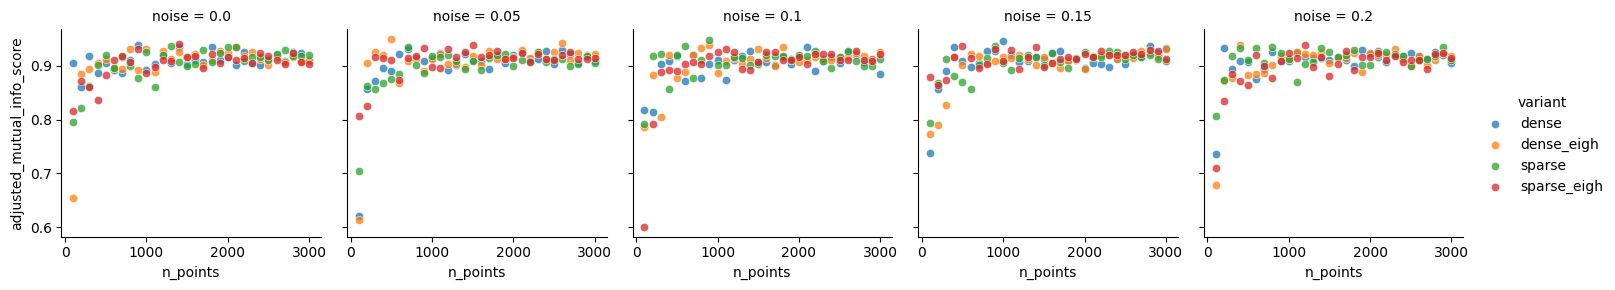

In [17]:
show_experiment_results('Decomposition')

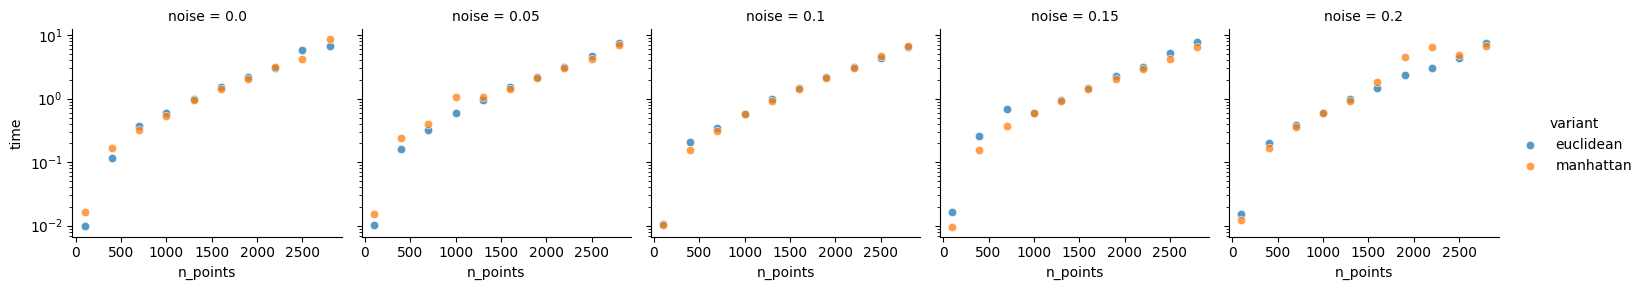

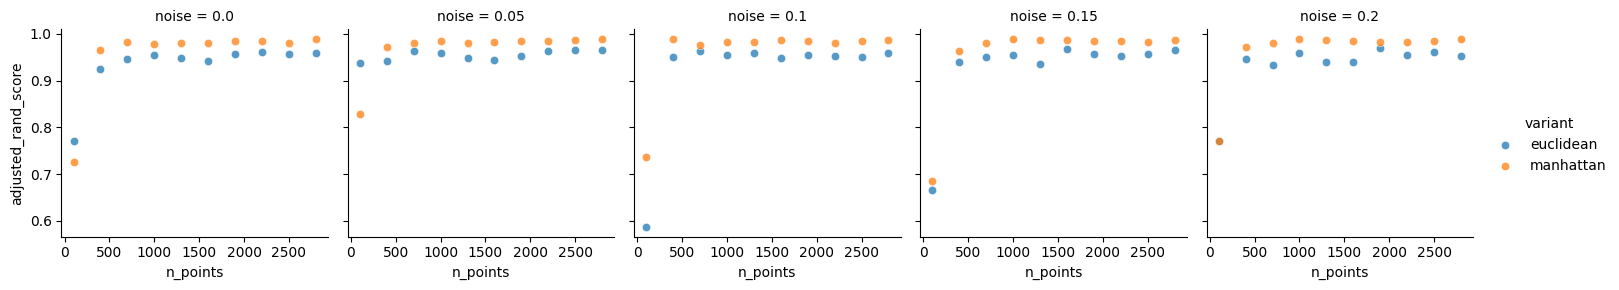

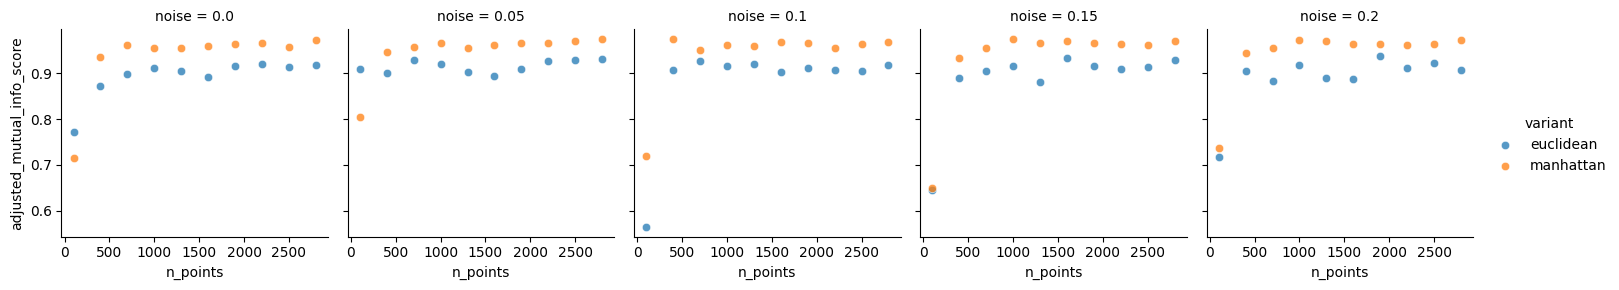

In [18]:
show_experiment_results('Affinity')

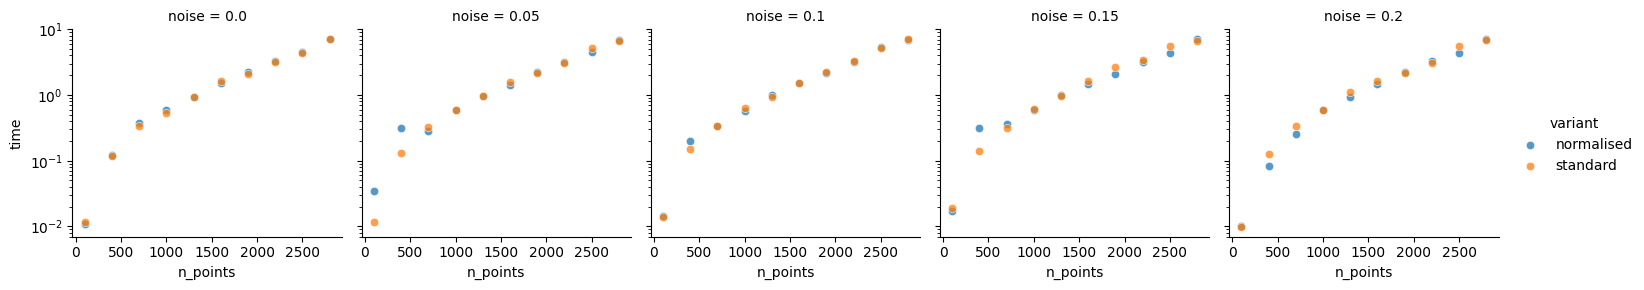

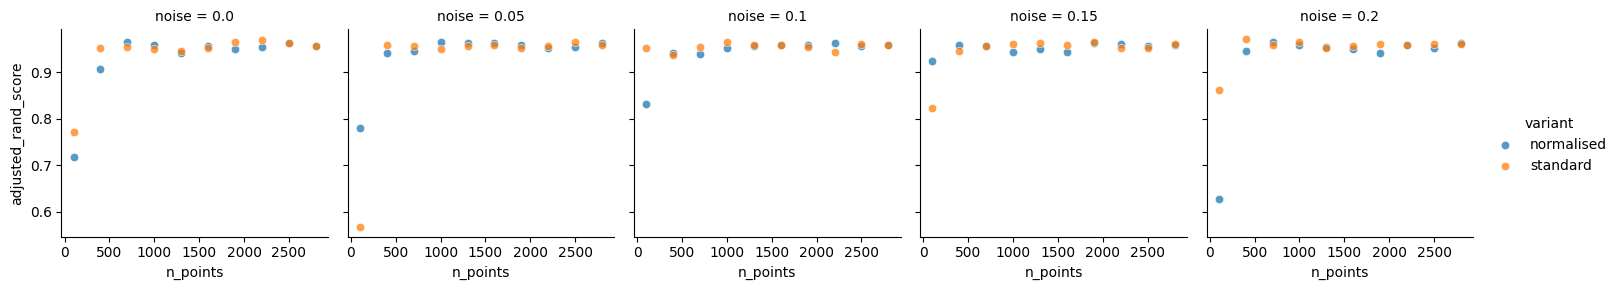

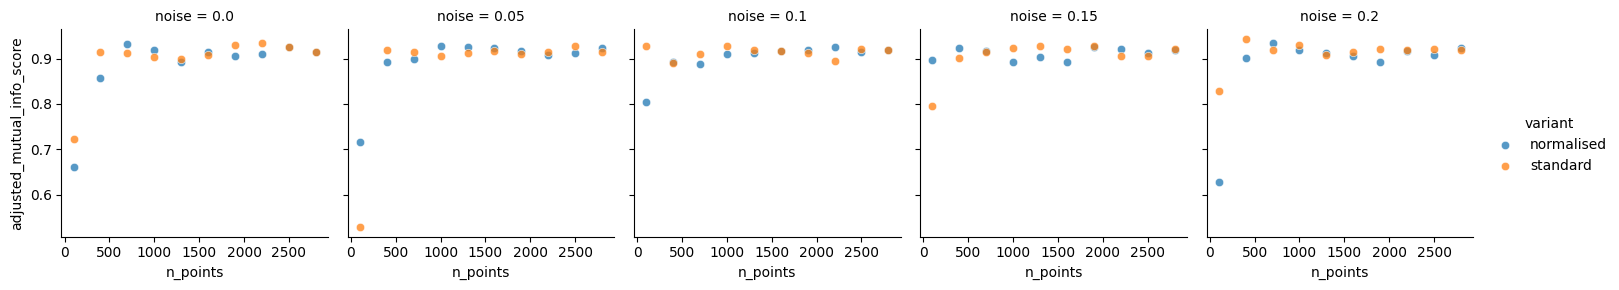

In [19]:
show_experiment_results('Laplacian')

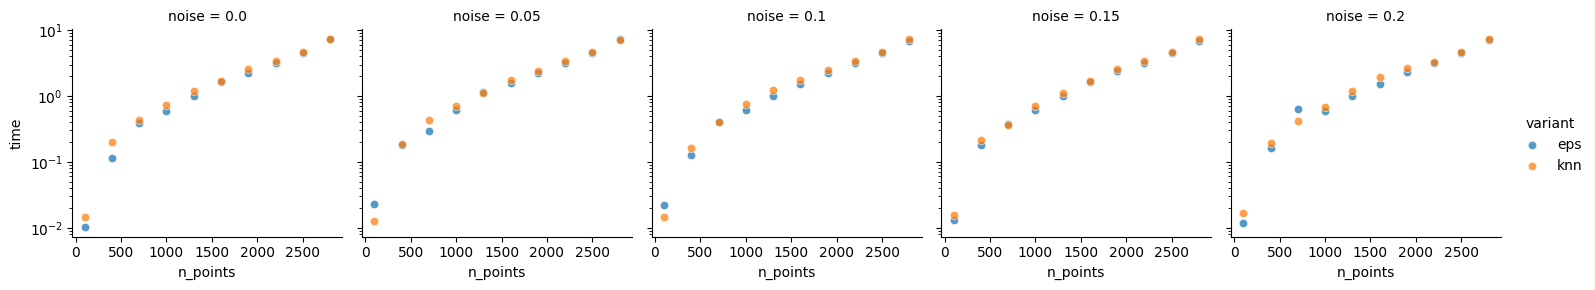

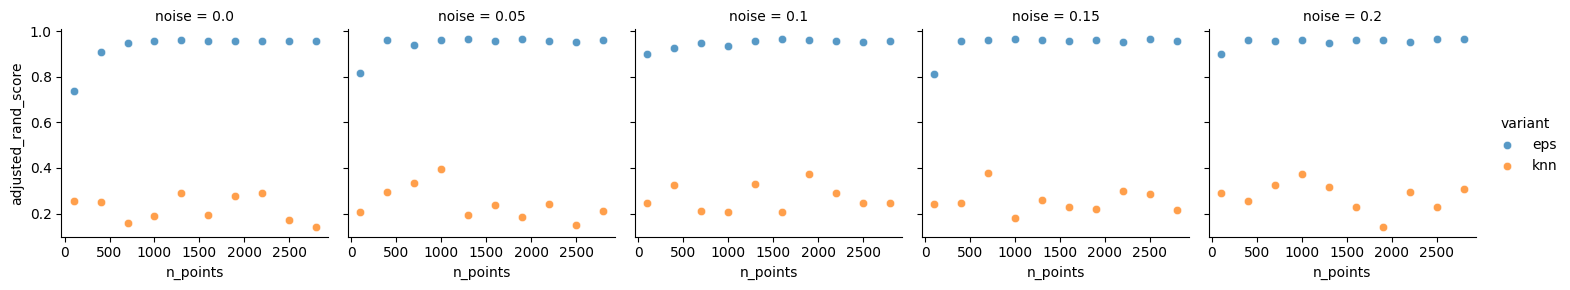

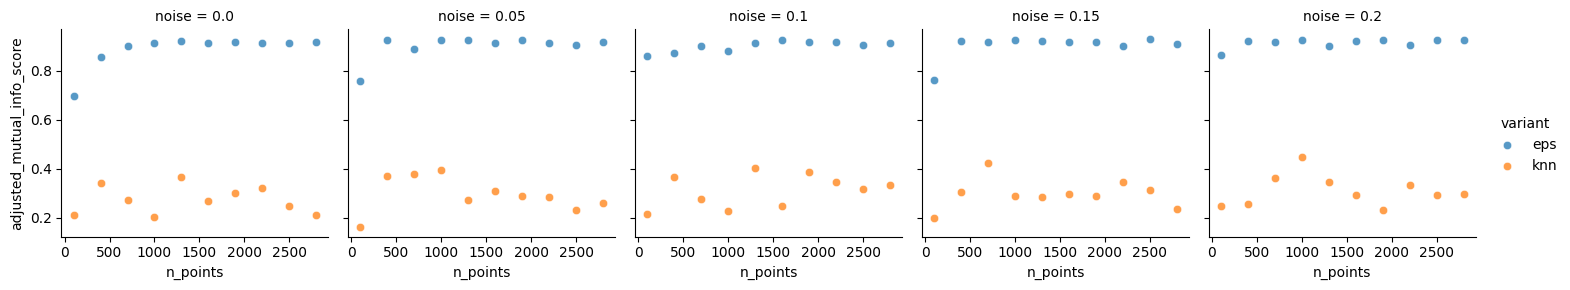

In [20]:
show_experiment_results('Refinement')

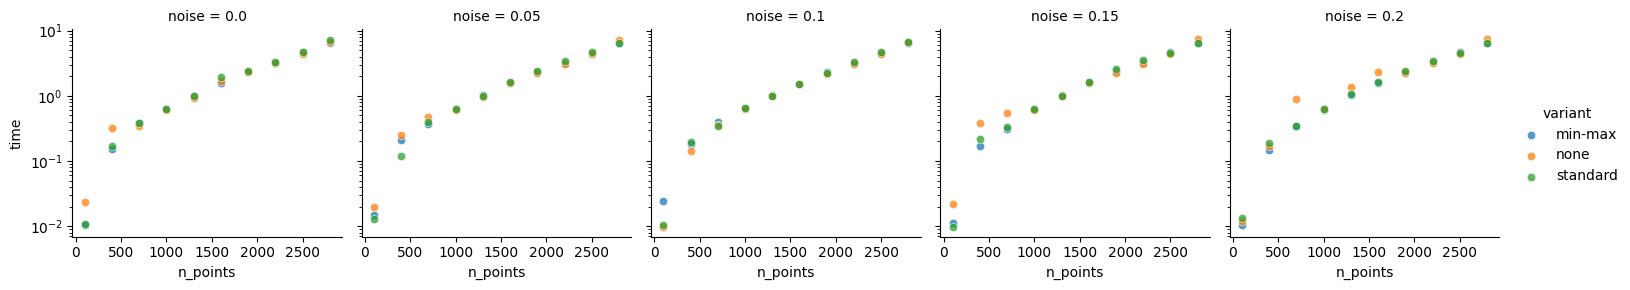

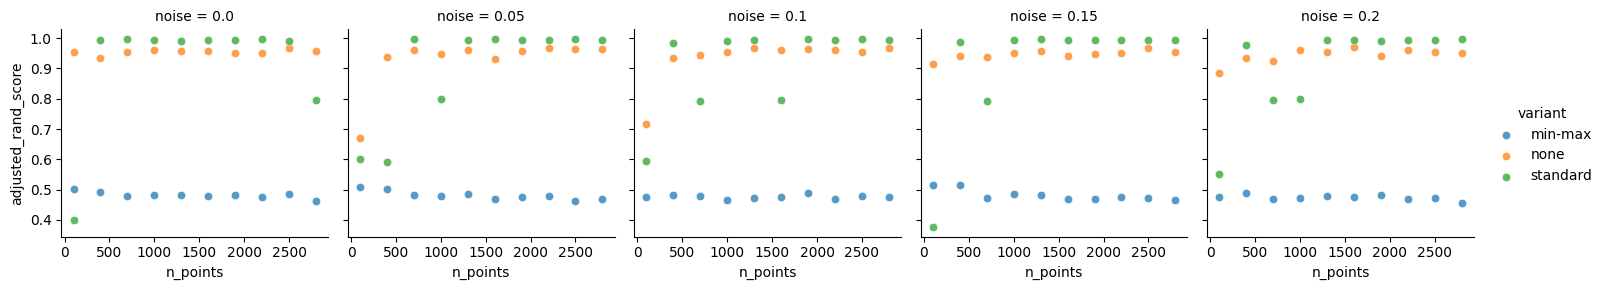

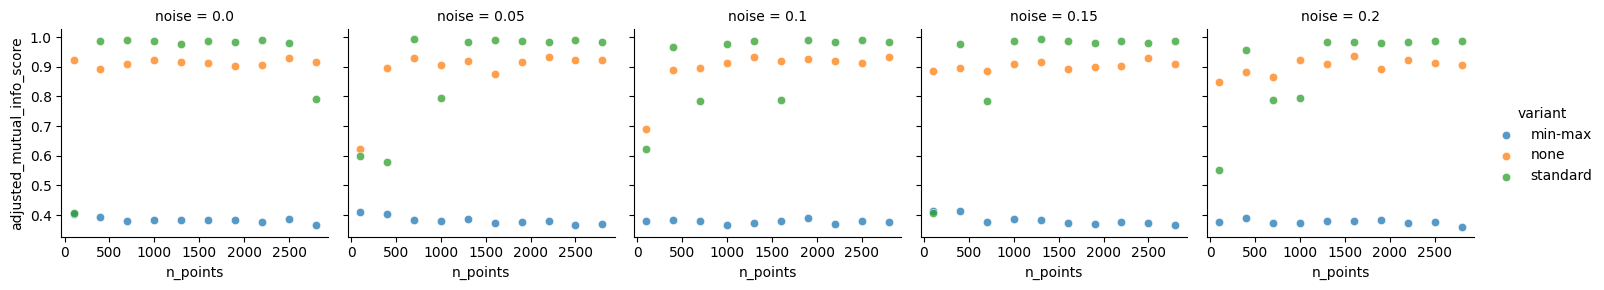

In [21]:
show_experiment_results('Standardisation')